In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
holiday=pd.read_csv("holidays_events.csv")
oil=pd.read_csv("oil.csv")
stores=pd.read_csv("stores.csv")
transaction=pd.read_csv("transactions.csv")
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("sample_submission.csv")
print(f'Holiday : {holiday.shape}')
print(f'oil : {oil.shape}')
print(f'stores : {stores.shape}')
print(f'transaction : {transaction.shape}')
print(f'train : {train.shape}')
print(f'test : {test.shape}')
print(f'submission : {submission.shape}')

Holiday : (350, 6)
oil : (1218, 2)
stores : (54, 5)
transaction : (83488, 3)
train : (3000888, 6)
test : (28512, 5)
submission : (28512, 2)


In [6]:
transaction.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [7]:
train["date"]=pd.to_datetime(train["date"])
holiday["date"]=pd.to_datetime(holiday["date"])
test["date"]=pd.to_datetime(test["date"])

oil["date"]=pd.to_datetime(oil["date"])

In [8]:
print(oil.dtypes)
print(oil.head())

date          datetime64[ns]
dcoilwtico           float64
dtype: object
        date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20


In [9]:
oil['date'] = oil['date'].sort_values()
print(oil['date'].min(),oil['date'].max())
print(len(oil))
print(oil.shape)

2013-01-01 00:00:00 2017-08-31 00:00:00
1218
(1218, 2)


### Checking inconsistent date

In [10]:
d3 = pd.date_range(start="2013-01-01",end="2017-08-31",) #  default frequency one day
print(d3)
print(len(d3))

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25',
               '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', length=1704, freq='D')
1704


In [11]:
print(len(set(d3).intersection(set(oil['date']))))
print(len(set(d3).difference(set(oil['date']))))

1218
486


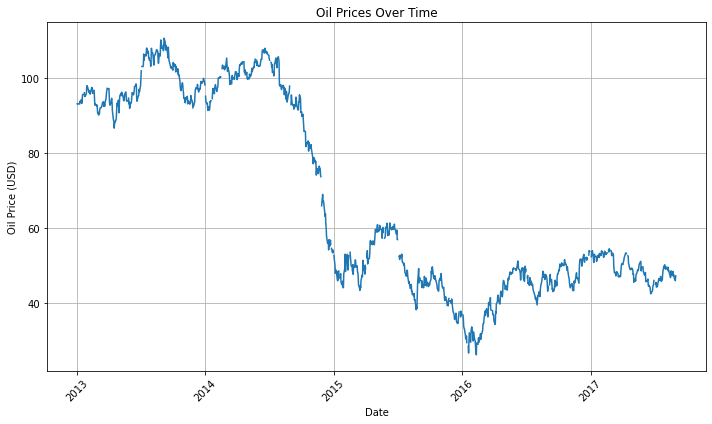

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(oil['date'], oil['dcoilwtico'], )
plt.title('Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### Createing a new dataframe with filling up the null values and the gaps btw the dates

In [13]:
date=pd.DataFrame({"date":d3})
date.head()


,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [14]:
date.shape

(1704, 1)

In [15]:
oil_new=date.copy()

In [16]:
oil_new=pd.merge(oil_new,oil,how="left",on="date")

In [17]:
oil_new.shape

(1704, 2)

### After filling the gaps of date now this graph is showing original nulls

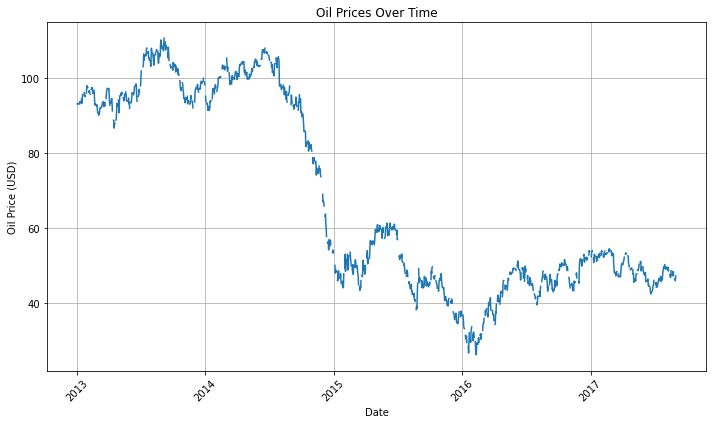

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(oil_new['date'], oil_new['dcoilwtico'], )
plt.title('Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### After filling up null values with bfill

In [19]:
oil_new['dcoilwtico']=oil_new['dcoilwtico'].bfill()

In [20]:
oil_new.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

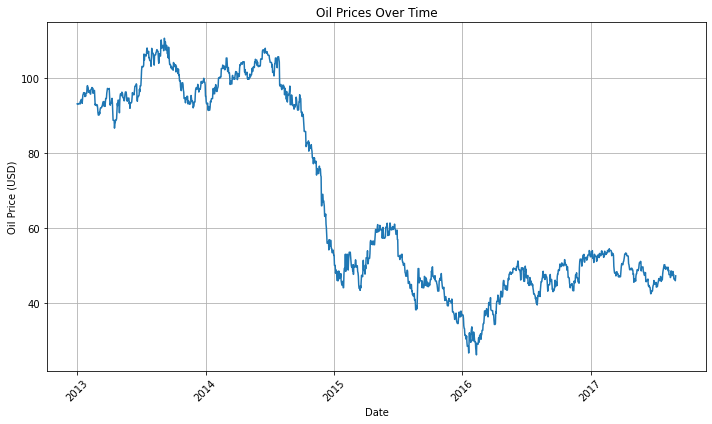

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(oil_new['date'], oil_new['dcoilwtico'], )
plt.title('Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In [22]:
oil_new=oil_new.rename(columns={"oil_date":"date"})

In [23]:
oil_new

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,93.20
...,...,...
1699,2017-08-27,46.40
1700,2017-08-28,46.40
1701,2017-08-29,46.46
1702,2017-08-30,45.96


In [24]:
holiday

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [25]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [26]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [27]:
new_train=pd.merge(train,stores,how="left",on="store_nbr")

In [28]:
new_train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


In [29]:
new_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
city           0
state          0
type           0
cluster        0
dtype: int64

In [30]:
new_train=pd.merge(new_train,oil_new,how="left",on="date")

In [31]:
new_train

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,93.14
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,93.14
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,93.14
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,93.14
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,93.14
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57


In [32]:
new_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
city           0
state          0
type           0
cluster        0
dcoilwtico     0
dtype: int64

In [33]:
holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [34]:
holiday.nunique()

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

In [35]:
holiday["transferred"].value_counts()

False    338
True      12
Name: transferred, dtype: int64

0    False
1    False
2    False
3    False
4    False
Name: transferred, dtype: bool

0

In [50]:
holiday["type"].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [36]:
holiday

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [38]:
holiday['transferred'] = holiday['transferred'].astype(bool).astype(int)

# Group by 'date' and summarize
holidays_events_agg = holiday.groupby('date').agg(
    num_holidays=('date', 'size'),  # Count number of holidays
    num_transferred=('transferred', 'sum')  # Sum of transferred holidays
).reset_index()

# Display the aggregated DataFrame
print(holidays_events_agg)

          date  num_holidays  num_transferred
0   2012-03-02             1                0
1   2012-04-01             1                0
2   2012-04-12             1                0
3   2012-04-14             1                0
4   2012-04-21             1                0
..         ...           ...              ...
307 2017-12-22             2                0
308 2017-12-23             1                0
309 2017-12-24             1                0
310 2017-12-25             1                0
311 2017-12-26             1                0

[312 rows x 3 columns]


In [40]:
holidays_events_agg.nunique()

date               312
num_holidays         4
num_transferred      2
dtype: int64

In [42]:
holidays_events_agg["num_transferred"].value_counts()

0    300
1     12
Name: num_transferred, dtype: int64

In [57]:
holidays_events_agg.tail()

,date,num_holidays,num_transferred
307,2017-12-22,2,0
308,2017-12-23,1,0
309,2017-12-24,1,0
310,2017-12-25,1,0
311,2017-12-26,1,0


In [43]:
holidays_events_agg["num_holidays"]

0      1
1      1
2      1
3      1
4      1
      ..
307    2
308    1
309    1
310    1
311    1
Name: num_holidays, Length: 312, dtype: int64

In [44]:
num_holidays

NameError: name 'num_holidays' is not defined

In [59]:
holiday.tail(50)

,date,type,locale,locale_name,description,transferred
300,2017-02-28,Holiday,National,Ecuador,Carnaval,0
301,2017-03-02,Holiday,Local,Manta,Fundacion de Manta,0
302,2017-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,0
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,1
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,0
305,2017-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,0
306,2017-04-14,Holiday,National,Ecuador,Viernes Santo,0
307,2017-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,0
308,2017-05-01,Holiday,National,Ecuador,Dia del Trabajo,0
309,2017-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,0


In [ ]:
# Group by 'date' and summarize
holidays_events_agg = holiday.groupby('date').agg(
    num_holidays=('date', 'size'),  # Count number of holidays
    num_transferred=('transferred', 'sum')  # Sum of transferred holidays
).reset_index()


In [56]:
holiday.groupby('date').agg({"date":["size"],"transferred":sum}).reset_index()

date      transferred
               size         sum
0   2012-03-02    1           0
1   2012-04-01    1           0
2   2012-04-12    1           0
3   2012-04-14    1           0
4   2012-04-21    1           0
..         ...  ...         ...
307 2017-12-22    2           0
308 2017-12-23    1           0
309 2017-12-24    1           0
310 2017-12-25    1           0
311 2017-12-26    1           0

[312 rows x 3 columns]

In [60]:
new_train

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,93.14
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,93.14
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,93.14
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,93.14
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,93.14
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57


In [61]:
holidays_events_agg

,date,num_holidays,num_transferred
0,2012-03-02,1,0
1,2012-04-01,1,0
2,2012-04-12,1,0
3,2012-04-14,1,0
4,2012-04-21,1,0
...,...,...,...
307,2017-12-22,2,0
308,2017-12-23,1,0
309,2017-12-24,1,0
310,2017-12-25,1,0


In [62]:
new_train=pd.merge(new_train,holidays_events_agg,how="left",on="date")

In [65]:
new_train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,num_holidays,num_transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,1.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,1.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,1.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,1.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,1.0,0.0


In [64]:
new_train.isnull().sum()

id                       0
date                     0
store_nbr                0
family                   0
sales                    0
onpromotion              0
city                     0
state                    0
type                     0
cluster                  0
dcoilwtico               0
num_holidays       2551824
num_transferred    2551824
dtype: int64